In [64]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [65]:
def plot_hist(semester, Stud_Data):
    sem_mean=np.zeros(len(semester))
    j=0
    # taking mean of every semester
    for i in semester:
        sem_mean[j]=Stud_Data[Stud_Data.Semester==i].mean().iloc[3]
        j-=-1
    #colors
    colors = ['red', 'tan', 'lime']
    fig, axes = plt.subplots(1,1,constrained_layout=True)
    #bar Graph
    axes.bar(semester, sem_mean,  width=0.5,color=colors)
    # Rotating the tick labels and setting their alignment.
    plt.setp(axes.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    axes.set_title("Semester Vs Mean SGPA")
    fig.savefig('Semester Vs Mean SGPA.png')
    plt.show()

In [66]:
def del_MS(df):
    file=['Advanced Research Methods',
        'Research in Marketing',
        'MS Thesis - I',
        'MS Thesis - II',
        'PhD Thesis - I',
        'PhD Thesis - II',
        'PhD Thesis - III',
        'PhD Thesis - IV',
        'Applied Programming', 
        'Research Methodology'
        ]
    for line in file:
        line = line.replace('\n','')
        indexNames = df[ df['Course Title'] == line ].index
        df.drop(indexNames,inplace=True)
    return df

In [67]:
def del_Sem(df):
    file=[
    20111,
    20121,
    20123,
    20131
    ]
    for line in file:
        line=int(line)
        indexNames = df[ df['Semester'] == line ].index
        df.drop(indexNames,inplace=True)
    return df

In [68]:
Stud_Data = pd.read_excel('./Course_Advisory_Data.xlsx')
Stud_Data=del_Sem(Stud_Data)
Stud_Data=del_MS(Stud_Data)
semesters=list(Stud_Data.Semester.unique())

In [69]:
def heat_map(semesters,Stud_Data):
    grades=['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','F','W','I','FA','L1','LL',
            'L2','F/R','A']
    fig, ax = plt.subplots(1,1,figsize=(10, 8),constrained_layout=True)
    df_new=Stud_Data.groupby(['Semester']).Grade.value_counts().unstack(fill_value=0).stack()
    data=np.zeros((len(semesters),len(grades)))
    im = ax.imshow(data)
    #We want to show all ticks...
    ax.set_xticks(np.arange(len(grades)))
    ax.set_yticks(np.arange(len(semesters)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(grades)
    ax.set_yticklabels(semesters)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(semesters)):
        for j in range(len(grades)):
            text = ax.text(j, i, df_new[semesters[i]][grades[j]],
                           ha="center", va="center", color="w")

    ax.set_title("Total of each Grade in every Semester")
    ax.set_ylim(len(semesters)-0.5, -0.5)
    ax.set_xlim(len(grades)-0.5, 0.-0.5)
    fig.savefig('Total of each Grade in every Semester.png')
    plt.show()

In [70]:
def plot_Stud_hist(Stud_Data,roll_nos):
    if(roll_nos in Stud_Data['Sr. No']):
        data=Stud_Data[Stud_Data['Sr. No']==roll_nos].groupby(['Semester']).SGPA.mean()
        #colors
        print(data.index.tolist())
        colors = ['magenta','red','blue','green', 'tan', 'lime']
        fig, axes = plt.subplots(1,1,constrained_layout=True)
        #bar Graph
        axes.bar(data.index.tolist(), data.to_list(),  width=0.5,color=colors)
        # Rotating the tick labels and setting their alignment.
        plt.setp(axes.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
        title="SGPA of "+str(roll_nos)
        axes.set_ylim(0,4)
        axes.set_title(title)
        picName=title+".png"
        fig.savefig(picName)
        plt.show()
    else:
        print("Not Found")

['Fall 2017', 'Fall 2018', 'Fall 2019', 'Spring 2018', 'Spring 2019']


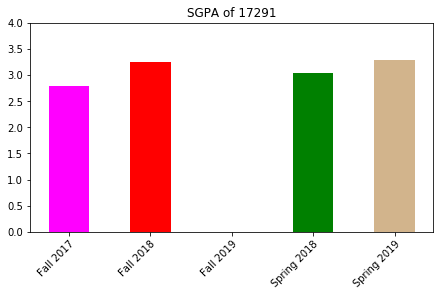

In [71]:
plot_Stud_hist(Stud_Data,17291)

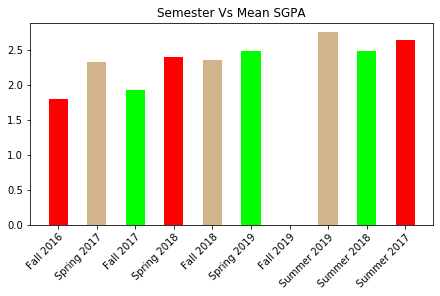

In [72]:
plot_hist(semesters,Stud_Data)

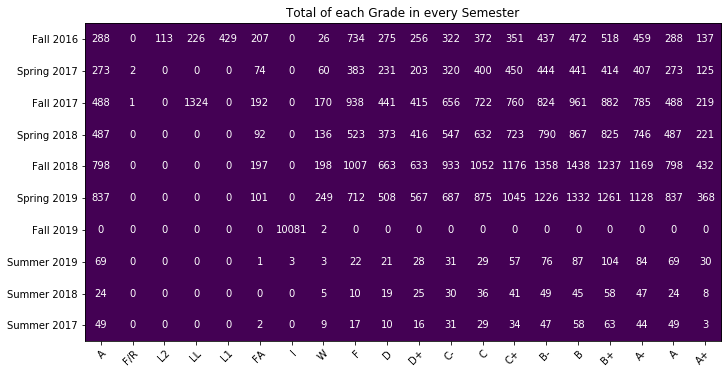

In [73]:
heat_map(semesters,Stud_Data)

In [74]:
def plot_warning(Stud_Data):
    labels = list(Stud_Data.Semester.unique())
    total=Stud_Data.Warning.sum()
    data=Stud_Data.groupby(['Semester']).Warning.sum()
    sizes = (data.to_list()/total)*100
    explode = np.full(len(labels),0.03) # only "explode" the 2nd slice (i.e. 'Hogs')
    
    fig1, ax1 = plt.subplots(figsize=(10, 8),constrained_layout=True)
    ax1.pie(sizes, explode=explode,
            shadow=False, startangle=90)
    ax1.legend(labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)], loc="best")
    title="Warning percentage in every Semester"
    ax1.set_title(title)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig1.savefig(title+".png")
    plt.show()

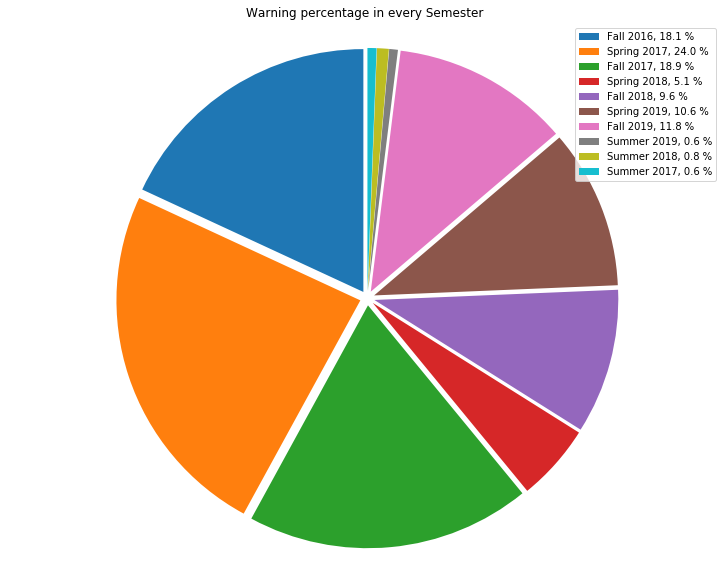

In [75]:
plot_warning(Stud_Data)

In [76]:
data=Stud_Data[Stud_Data['Semester']=='Fall 2018'].groupby(['Semester']).Grade.value_counts()
data=data.to_list()
data

[1438,
 1358,
 1237,
 1176,
 1169,
 1052,
 1007,
 933,
 798,
 663,
 633,
 432,
 198,
 197,
 1]

In [77]:
def plot_Sem_Grade(Stud_Data,Sem):
    data=Stud_Data[Stud_Data['Semester']==Sem].groupby(['Semester']).Grade.value_counts()
    labels = data.index.tolist()
    sizes=data.to_list()
    explode = np.full(len(labels),0.03) # only "explode" the 2nd slice (i.e. 'Hogs')
    
    fig1, ax1 = plt.subplots(figsize=(10, 8),constrained_layout=True)
    ax1.pie(sizes, explode=explode,
            shadow=False, startangle=90)
    ax1.legend(labels=[ (l, s) for l, s in zip(labels, sizes)], loc="best")
    title="Total of each grades in "+str(Sem) 
    ax1.set_title(title)
    ax1.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.
    fig1.savefig(title+".png")
    plt.show()

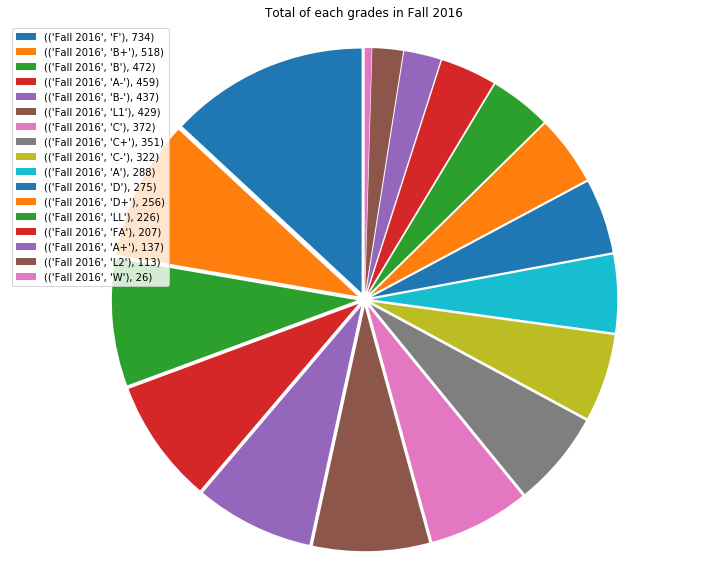

In [78]:
plot_Sem_Grade(Stud_Data,'Fall 2016')

In [79]:
def heat_map_Stud(Stud_Data,roll_no):
    fig, ax = plt.subplots(1,1,figsize=(10, 8),constrained_layout=True)
    df_new=Stud_Data[Stud_Data['Sr. No']==roll_no].groupby(['Semester']).Grade.value_counts().unstack(fill_value=0).stack()
    index=df_new.index.tolist()
    res_list = [x[0] for x in index]
    res_list=np.array(res_list)
    semesters=list(np.unique(res_list))
    grades=[x[1] for x in index]
    grades=np.array(grades)
    grades=list(np.unique(grades))
    shape=np.zeros((len(semesters),len(grades)))
    im = ax.imshow(shape)
   
    #We want to show all ticks...
    ax.set_xticks(np.arange(len(grades)))
    ax.set_yticks(np.arange(len(semesters)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(grades)
    ax.set_yticklabels(semesters)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(semesters)):
        for j in range(len(grades)):
            text = ax.text(j, i, df_new[semesters[i]][grades[j]],
                           ha="center", va="center", color="w")
    title="Total of each Grade in every Semester of "+str(roll_no)
    ax.set_title(title)
    ax.set_ylim(len(semesters)-0.5, -0.5)
    ax.set_xlim(len(grades)-0.5, 0.-0.5)
    fig.savefig(title+".png")
    plt.show()

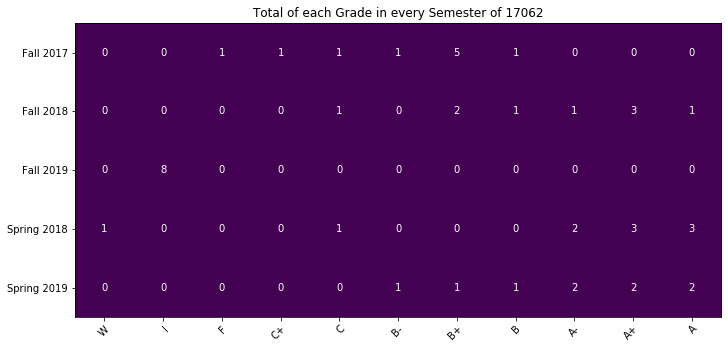

In [80]:
heat_map_Stud(Stud_Data,17062)

In [81]:
def heat_map_Sub(Stud_Data,Subject):
    fig, ax = plt.subplots(1,1,figsize=(10, 8),constrained_layout=True)
    df_new=Stud_Data[Stud_Data['Course Title']==Subject].groupby(['Semester']).Grade.value_counts().unstack(fill_value=0).stack()
    index=df_new.index.tolist()
    res_list = [x[0] for x in index]
    res_list=np.array(res_list)
    semesters=list(np.unique(res_list))
    grades=[x[1] for x in index]
    grades=np.array(grades)
    grades=list(np.unique(grades))
    shape=np.zeros((len(semesters),len(grades)))
    im = ax.imshow(shape)
   
    #We want to show all ticks...
    ax.set_xticks(np.arange(len(grades)))
    ax.set_yticks(np.arange(len(semesters)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(grades)
    ax.set_yticklabels(semesters)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(semesters)):
        for j in range(len(grades)):
            text = ax.text(j, i, df_new[semesters[i]][grades[j]],
                           ha="center", va="center", color="w")
    title="Total of each Grade in every Semester of "+str(Subject)
    ax.set_title(title)
    ax.set_ylim(len(semesters)-0.5, -0.5)
    ax.set_xlim(len(grades)-0.5, 0.-0.5)
    fig.savefig(title+".png")
    plt.show()

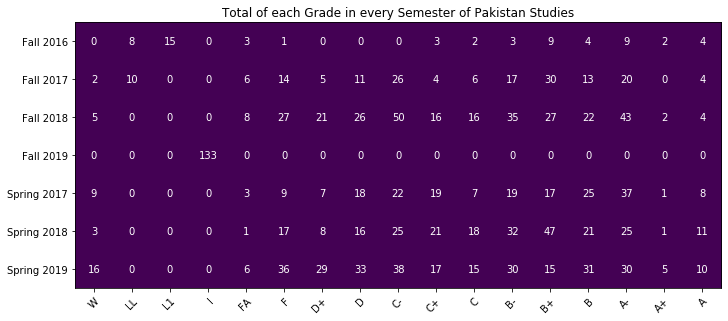

In [82]:
heat_map_Sub(Stud_Data,'Pakistan Studies')

In [83]:
def plot_hist_Sub(Stud_Data,Subject):
    df_new=Stud_Data[Stud_Data['Course Title']==Subject].groupby(['Semester'])['Grade Point'].mean()
    GPA=df_new.to_list()
    semesters=df_new.index.tolist()
    #colors
    colors = ['magenta','red','blue','green', 'tan', 'lime']
    fig, axes = plt.subplots(1,1,constrained_layout=True)
    #bar Graph
    axes.bar(semesters, GPA,  width=0.5,color=colors)
    # Rotating the tick labels and setting their alignment.
    plt.setp(axes.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    title="Mean GPA of "+Subject
    axes.set_title(title)
    axes.set_ylim(0,4)
    fig.savefig(title+".png")
    plt.show()

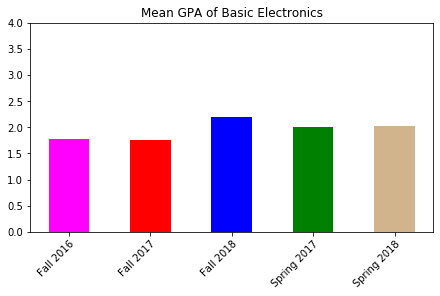

In [84]:
plot_hist_Sub(Stud_Data,'Basic Electronics')